In [301]:
# Import all Libraries

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [178]:
# Data Import and Exploration
housing = pd.read_csv("train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [110]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [111]:
housing.shape

(1460, 81)

In [112]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [113]:
# Finding Percentage of Missing Values
(housing.isnull().sum()/len(housing))*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [179]:
# Drop ID column as its a ID number against each record
# Drop Alley, PoolQC, MiscFeature columns as more than 90% of the rows are na values in these columns
housing.drop(['Id','Alley','PoolQC','MiscFeature'],axis=1,inplace=True)

In [180]:
for i in housing.columns:
    print(housing[i].value_counts()/len(housing[i])*100)

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
60.0     9.794521
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
65.0     3.013699
85.0     2.739726
78.0     1.712329
21.0     1.575342
90.0     1.575342
68.0     1.301370
24.0     1.301370
64.0     1.301370
73.0     1.232877
72.0     1.164384
79.0     1.164384
63.0     1.164384
55.0     1.164384
100.0    1.095890
51.0     1.027397
66.0     1.027397
74.0     1.027397
52.0     0.958904
59.0     0.890411
71.0     0.821918
82.0     0.821918
40.0     0.821918
43.0     0.821918
67.0     0.821918
57.0     0.821918
69.0     0.753425
76.0     0.753425


In [181]:
#Drop PoolArea,3SsnPorch, LowQualFinSF, Heating, RoofMatl, Condition2, Utilities, Street as more than 96% of the data has one value. 
#As not much variance is captured by these columns, dropping these columns from our dataframe 
housing.drop(['MiscVal','PoolArea','3SsnPorch','LowQualFinSF','Heating','RoofMatl','Condition2','Utilities','Street'],axis=1,inplace=True)

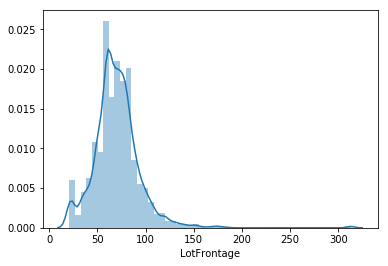

In [117]:
# View histogram for LotFrontage
sns.distplot(housing[~housing['LotFrontage'].isnull()]['LotFrontage'])

In [182]:
# As we can see a normal distribution for LotFrontage, imputing na values for this column with mean value i.e 70
housing['LotFrontage'].fillna(70,inplace=True)

In [183]:
# The records for which MasVnrType [Masonry veneer type] has NA, 
# the same records have NA values for MasVnrArea [Masonry veneer area in square feet] column as well

housing[housing['MasVnrType'].isna()]

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
234           60       RL         70.0     7851      Reg         Lvl   
529           20       RL         70.0    32668      IR1         Lvl   
650           60       FV         65.0     8125      Reg         Lvl   
936           20       RL         67.0    10083      Reg         Lvl   
973           20       FV         95.0    11639      Reg         Lvl   
977          120       FV         35.0     4274      IR1         Lvl   
1243          20       RL        107.0    13891      Reg         Lvl   
1278          60       RL         75.0     9473      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
234     Inside       Gtl      Gilbert       Norm     1Fam     2Story   
529    CulDSac       Gtl      Crawfor       Norm     1Fam     1Story   
650     Inside       Gtl      Somerst       Norm     1Fam     2Story   
936     Inside       Gtl      SawyerW       Norm     1Fam     1Story   
973     Corner       Gtl      Somerst       Norm     1Fam     1Story   
977     Inside       Gtl      Somerst       Norm   TwnhsE     1Story   
1243    Inside       Gtl      NridgHt       Norm     1Fam     1Story   
1278    Inside       Gtl      CollgCr       Norm     1Fam     2Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st  \
234             6            5       2002          2002     Gable     VinylSd   
529             6            3       1957          1975       Hip     Wd Sdng   
650             7            6       2007          2007     Gable     CemntBd   
936             7            5       2003          2003     Gable     VinylSd   
973             7            5       2007          2008     Gable     CemntBd   
977             7            5       2006          2007     Gable     VinylSd   
1243           10            5       2006          2006     Gable     VinylSd   
1278            8            5       2002          2002     Gable     VinylSd   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
234      VinylSd        NaN         NaN        Gd        TA      PConc   
529        Stone        NaN         NaN        Gd        TA      PConc   
650      CmentBd        NaN         NaN        Gd        TA      PConc   
936      VinylSd        NaN         NaN        Gd        TA      PConc   
973      CmentBd        NaN         NaN        Gd        TA      PConc   
977      VinylSd        NaN         NaN        Gd        TA      PConc   
1243     VinylSd        NaN         NaN        Ex        TA      PConc   
1278     VinylSd        NaN         NaN        Gd        TA      PConc   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
234        Gd       TA           No          GLQ         625          Unf   
529        TA       TA           No          Rec        1219          Unf   
650        Gd       TA           No          Unf           0          Unf   
936        Gd       TA           No          GLQ         833          Unf   
973        Gd       TA           No          Unf           0          Unf   
977        Gd       TA           No          GLQ        1106          Unf   
1243       Ex       Gd           Gd          GLQ        1386          Unf   
1278       Gd       TA           No          GLQ         804          Unf   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir Electrical  \
234            0        235          860        Ex          Y      SBrkr   
529            0        816         2035        TA          Y      SBrkr   
650            0        813          813        Ex          Y      SBrkr   
936            0        343         1176        Ex          Y      SBrkr   
973            0       1428         1428        Ex          Y      SBrkr   
977            0        135         1241        Ex          Y      SBrkr   
1243           0        690         2076        Ex          Y      SBrkr   
1278     

In [120]:
# Viewing value count for MasVnrType
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [121]:
# Viewing value count for MasVnrArea
housing['MasVnrArea'].value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2
66.0        2
660.0       2
243.0       2
338.0       2
143.0       2
318.0       2
285.0 

In [184]:
# Majority of the records i.e around 860 are with value None for MasVnrType and the corresponding reords have value 0 in MasVnrArea
# Hence imputing the NA values as None for MasVnrType and 0 for MasVnrArea
housing['MasVnrType'].fillna('None',inplace=True)
housing['MasVnrArea'].fillna(0,inplace=True)

In [123]:
housing[housing['BsmtExposure'].isna()].head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
17           90       RL         72.0    10791      Reg         Lvl    Inside   
39           90       RL         65.0     6040      Reg         Lvl    Inside   
90           20       RL         60.0     7200      Reg         Lvl    Inside   
102          90       RL         64.0     7018      Reg         Bnk    Inside   
156          20       RL         60.0     7200      Reg         Lvl    Inside   

    LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
17        Gtl       Sawyer       Norm   Duplex     1Story            4   
39        Gtl      Edwards       Norm   Duplex     1Story            4   
90        Gtl        NAmes       Norm     1Fam     1Story            4   
102       Gtl      SawyerW       Norm   Duplex     1Story            5   
156       Gtl        NAmes       Norm     1Fam     1Story            5   

     OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd  \
17             5       1967          1967     Gable     MetalSd     MetalSd   
39             5       1955          1955     Gable     AsbShng     Plywood   
90             5       1950          1950     Gable     BrkFace     Wd Sdng   
102            5       1979          1979     Gable     HdBoard     HdBoard   
156            7       1950          1950       Hip     Wd Sdng     Wd Sdng   

    MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
17        None         0.0        TA        TA       Slab      NaN      NaN   
39        None         0.0        TA        TA      PConc      NaN      NaN   
90        None         0.0        TA        TA       Slab      NaN      NaN   
102       None         0.0        TA        Fa       Slab      NaN      NaN   
156       None         0.0        TA        TA     CBlock      NaN      NaN   

    BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
17           NaN          NaN           0          NaN           0          0   
39           NaN          NaN           0          NaN           0          0   
90           NaN          NaN           0          NaN           0          0   
102          NaN          NaN           0          NaN           0          0   
156          NaN          NaN           0          NaN           0          0   

     TotalBsmtSF HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
17             0        TA          Y      SBrkr      1296         0   
39             0        TA          N      FuseP      1152         0   
90             0        TA          Y      FuseA      1040         0   
102            0        TA          Y      SBrkr      1535         0   
156            0        TA          Y      FuseF      1040         0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
17        1296             0             0         2         0             2   
39        1152             0             0         2         0             2   
90        1040             0             0         1         0             2   
102       1535             0             0         2         0             4   
156       1040             0             0         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
17              2          TA             6        Typ           0   
39              2          Fa             6        Typ           0   
90              1          TA             4        Typ           0   
102             2          TA             8        Typ           0   
156             1          TA             5        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
17          NaN    CarPort       1967.0          Unf           2         516   
39          NaN        NaN          NaN          NaN           0           0   
90          NaN     Detchd       1950.0          Unf         

In [124]:
housing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [125]:
housing['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [126]:
housing['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [127]:
housing['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [128]:
housing['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [185]:
# Imputing NA values with most occuring value; for BsmtQual & BsmtCond with TA,  BsmtExposure with No, BsmtFinType1 & BsmtFinType2 with Unf
housing['BsmtQual'].fillna('TA',inplace=True)
housing['BsmtCond'].fillna('TA',inplace=True)
housing['BsmtFinType1'].fillna('Unf',inplace=True)
housing['BsmtFinType2'].fillna('Unf',inplace=True)
housing['BsmtExposure'].fillna('No',inplace=True)

In [130]:
# view value count for Electrical column 
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [131]:
housing[housing['Electrical'].isna()]

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
1379          80       RL         73.0     9735      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
1379    Inside       Gtl       Timber       Norm     1Fam       SLvl   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st  \
1379            5            5       2006          2007     Gable     VinylSd   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
1379     VinylSd       None         0.0        TA        TA      PConc   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
1379       Gd       TA           No          Unf           0          Unf   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir Electrical  \
1379           0        384          384        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1379       754       640       1394             0             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
1379         1             3             1          Gd             7   

     Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  \
1379        Typ           0         NaN    BuiltIn       2007.0          Fin   

      GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
1379           2         400         TA         TA          Y         100   

      OpenPorchSF  EnclosedPorch  ScreenPorch Fence  MoSold  YrSold SaleType  \
1379            0              0            0   NaN       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

In [186]:
# impute the one row which has NA value for Electrical column with most occuring value i.e SBrkr
housing['Electrical'].fillna('SBrkr',inplace=True)

In [187]:
# Number of records with No Fireplace and NA Fireplace Quality
housing[(housing['Fireplaces']==0) & (housing['FireplaceQu'].isna())].shape[0]

690

In [188]:
# Impute all the 690 records of FireplaceQu having NAN values with NA which means No Fireplace
housing['FireplaceQu'].fillna('NA',inplace=True)

In [135]:
# All the houses with no garages have NA values in Garage Type, Year Built, Grarage Finish, Garage Condition & Quality
housing[housing['GarageType'].isna()]

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
39            90       RL         65.0     6040      Reg         Lvl   
48           190       RM         33.0     4456      Reg         Lvl   
78            90       RL         72.0    10778      Reg         Lvl   
88            50  C (all)        105.0     8470      IR1         Lvl   
89            20       RL         60.0     8070      Reg         Lvl   
99            20       RL         77.0     9320      IR1         Lvl   
108           50       RM         85.0     8500      Reg         Lvl   
125          190       RM         60.0     6780      Reg         Lvl   
127           45       RM         55.0     4388      IR1         Bnk   
140           20       RL         70.0    10500      Reg         Lvl   
148           20       RL         63.0     7500      Reg         Lvl   
155           50       RL         60.0     9600      Reg         Lvl   
163           45       RL         55.0     5500      Reg         Lvl   
165          190       RL         62.0    10106      Reg         Lvl   
198           75       RM         92.0     5520      Reg         Lvl   
210           30       RL         67.0     5604      Reg         Lvl   
241           30       RM         40.0     3880      Reg         Lvl   
250           30       RL         55.0     5350      IR1         Lvl   
287           20       RL         70.0     8125      IR1         Lvl   
291          190       RL         55.0     5687      Reg         Bnk   
307           50       RM         70.0     7920      IR1         Lvl   
375           30       RL         70.0    10020      IR1         Low   
386           50       RL         58.0     8410      Reg         Lvl   
393           30       RL         70.0     7446      Reg         Lvl   
431           50       RM         60.0     5586      IR1         Bnk   
434          180       RM         21.0     1890      Reg         Lvl   
441           90       RL         92.0    12108      Reg         Lvl   
464           20       RL         60.0     8430      Reg         HLS   
495           30  C (all)         60.0     7879      Reg         Lvl   
520          190       RL         60.0    10800      Reg         Lvl   
528           30       RL         58.0     9098      IR1         Lvl   
533           20       RL         50.0     5000      Reg         Low   
535          190       RL         70.0     7000      Reg         Lvl   
562           30       RL         63.0    13907      Reg         Lvl   
582           90       RL         81.0    11841      Reg         Lvl   
613           20       RL         70.0     8402      Reg         Lvl   
614          180       RM         21.0     1491      Reg         Lvl   
620           30       RL         45.0     8248      Reg         Lvl   
635          190       RH         60.0    10896      Reg         Bnk   
636           30       RM         51.0     6120      Reg         Lvl   
638           30       RL         67.0     8777      Reg         Lvl   
649          180       RM         21.0     1936      Reg         Lvl   
705          190       RM         70.0     5600      Reg         Lvl   
710           30       RL         56.0     4130      IR1         Lvl   
738           90       RL         60.0    10800      Reg         Lvl   
750           50       RM         55.0     8800      Reg         Lvl   
784           75       RM         35.0     6300      Reg         Lvl   
826           45       RM         50.0     6130      Reg         Lvl   
843           90       RL         80.0     8000      Reg         Lvl   
921           90       RL         67.0     8777      Reg         Lvl   
942           90       RL         42.0     7711      IR1         Lvl   
954           90       RL         35.0     9400      IR1         Lvl   
960           20       RL         50.0     7207      IR1         Lvl   
968           50       RM         50.0     5925      Reg         Lvl   
970           50       RL         60.0    1080

In [189]:
# Impute the NA values for GarageType,GarageFinish,GarageQual & GarageCond with NA i.e No Garage,GarageYrBlt with 0
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    housing[col].fillna('NA',inplace=True)
housing['GarageYrBlt'].fillna(0,inplace=True)

In [137]:
# View NAN records for Fence column
housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [190]:
# Impute NAN reords for Fence columns with NA value which means No Fence
housing['Fence'].fillna('NA',inplace=True)

In [191]:
# Finding Percentage of Missing Values - All columns have zero NAN values.
(housing.isnull().sum()/len(housing))*100

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional   

In [192]:
# Compute a columns called No. of years since remodelled

def yR(row):
    if row['YearRemodAdd']==row['YearBuilt']:
        return 999
    else:
        return 2019-row['YearRemodAdd'] 

housing['YearsSinceRemod']=housing.apply(lambda row: yR(row),axis=1)

In [193]:
# Compute columns called No. of Years since built & No. of years since Garage Built
housing['YearsSinceBuilt']=2019-housing['YearBuilt']
housing['YearsSinceGarage']=2019-housing['GarageYrBlt']
housing['YearsSinceGarage']=housing['YearsSinceGarage'].replace({2019:999})

In [194]:
# Drop column MoSold as they are not useful for our analysis. Also drop the orginal variables - YearRemodAdd,YearBuilt & GarageYrBlt
housing.drop(['MoSold','YearRemodAdd','YearBuilt','GarageYrBlt'],axis=1,inplace=True)

In [195]:
housing.head(100)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0           60       RL         65.0     8450      Reg         Lvl    Inside   
1           20       RL         80.0     9600      Reg         Lvl       FR2   
2           60       RL         68.0    11250      IR1         Lvl    Inside   
3           70       RL         60.0     9550      IR1         Lvl    Corner   
4           60       RL         84.0    14260      IR1         Lvl       FR2   
5           50       RL         85.0    14115      IR1         Lvl    Inside   
6           20       RL         75.0    10084      Reg         Lvl    Inside   
7           60       RL         70.0    10382      IR1         Lvl    Corner   
8           50       RM         51.0     6120      Reg         Lvl    Inside   
9          190       RL         50.0     7420      Reg         Lvl    Corner   
10          20       RL         70.0    11200      Reg         Lvl    Inside   
11          60       RL         85.0    11924      IR1         Lvl    Inside   
12          20       RL         70.0    12968      IR2         Lvl    Inside   
13          20       RL         91.0    10652      IR1         Lvl    Inside   
14          20       RL         70.0    10920      IR1         Lvl    Corner   
15          45       RM         51.0     6120      Reg         Lvl    Corner   
16          20       RL         70.0    11241      IR1         Lvl   CulDSac   
17          90       RL         72.0    10791      Reg         Lvl    Inside   
18          20       RL         66.0    13695      Reg         Lvl    Inside   
19          20       RL         70.0     7560      Reg         Lvl    Inside   
20          60       RL        101.0    14215      IR1         Lvl    Corner   
21          45       RM         57.0     7449      Reg         Bnk    Inside   
22          20       RL         75.0     9742      Reg         Lvl    Inside   
23         120       RM         44.0     4224      Reg         Lvl    Inside   
24          20       RL         70.0     8246      IR1         Lvl    Inside   
25          20       RL        110.0    14230      Reg         Lvl    Corner   
26          20       RL         60.0     7200      Reg         Lvl    Corner   
27          20       RL         98.0    11478      Reg         Lvl    Inside   
28          20       RL         47.0    16321      IR1         Lvl   CulDSac   
29          30       RM         60.0     6324      IR1         Lvl    Inside   
30          70  C (all)         50.0     8500      Reg         Lvl    Inside   
31          20       RL         70.0     8544      IR1         Lvl   CulDSac   
32          20       RL         85.0    11049      Reg         Lvl    Corner   
33          20       RL         70.0    10552      IR1         Lvl    Inside   
34         120       RL         60.0     7313      Reg         Lvl    Inside   
35          60       RL        108.0    13418      Reg         Lvl    Inside   
36          20       RL        112.0    10859      Reg         Lvl    Corner   
37          20       RL         74.0     8532      Reg         Lvl    Inside   
38          20       RL         68.0     7922      Reg         Lvl    Inside   
39          90       RL         65.0     6040      Reg         Lvl    Inside   
40          20       RL         84.0     8658      Reg         Lvl    Inside   
41          20       RL        115.0    16905      Reg         Lvl    Inside   
42          85       RL         70.0     9180      IR1         Lvl   CulDSac   
43          20       RL         70.0     9200      IR1         Lvl   CulDSac   
44          20       RL         70.0     7945      Reg         Lvl    Inside   
45         120       RL         61.0     7658      Reg         Lvl    Inside   
46          50       RL         48.0    12822      IR1         Lvl   CulDSac   
47          20       FV         84.0    11096      Reg         Lvl    Inside   
48         190       RM         33.0     4456      Reg         Lvl    Inside   
49  

In [144]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
MSSubClass          1460 non-null int64
MSZoning            1460 non-null object
LotFrontage         1460 non-null float64
LotArea             1460 non-null int64
LotShape            1460 non-null object
LandContour         1460 non-null object
LotConfig           1460 non-null object
LandSlope           1460 non-null object
Neighborhood        1460 non-null object
Condition1          1460 non-null object
BldgType            1460 non-null object
HouseStyle          1460 non-null object
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
RoofStyle           1460 non-null object
Exterior1st         1460 non-null object
Exterior2nd         1460 non-null object
MasVnrType          1460 non-null object
MasVnrArea          1460 non-null float64
ExterQual           1460 non-null object
ExterCond           1460 non-null object
Foundation          1460 non-null 

In [196]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  YrSold  SalePrice  \
0           61              0            0    2008     208500   
1            0              0            0    2007     181500   
2           42              0            0    2008     223500   
3           35            272            0    2006     140000   
4           84              0            0    2008     250000   

   YearsSinceRemod  YearsSinceBuilt  YearsSinceGarage  
0              999               16              16.0  
1              999               43              43.0  
2               17               18              18.0  
3               49              104              21.0  
4              999               19              19.0

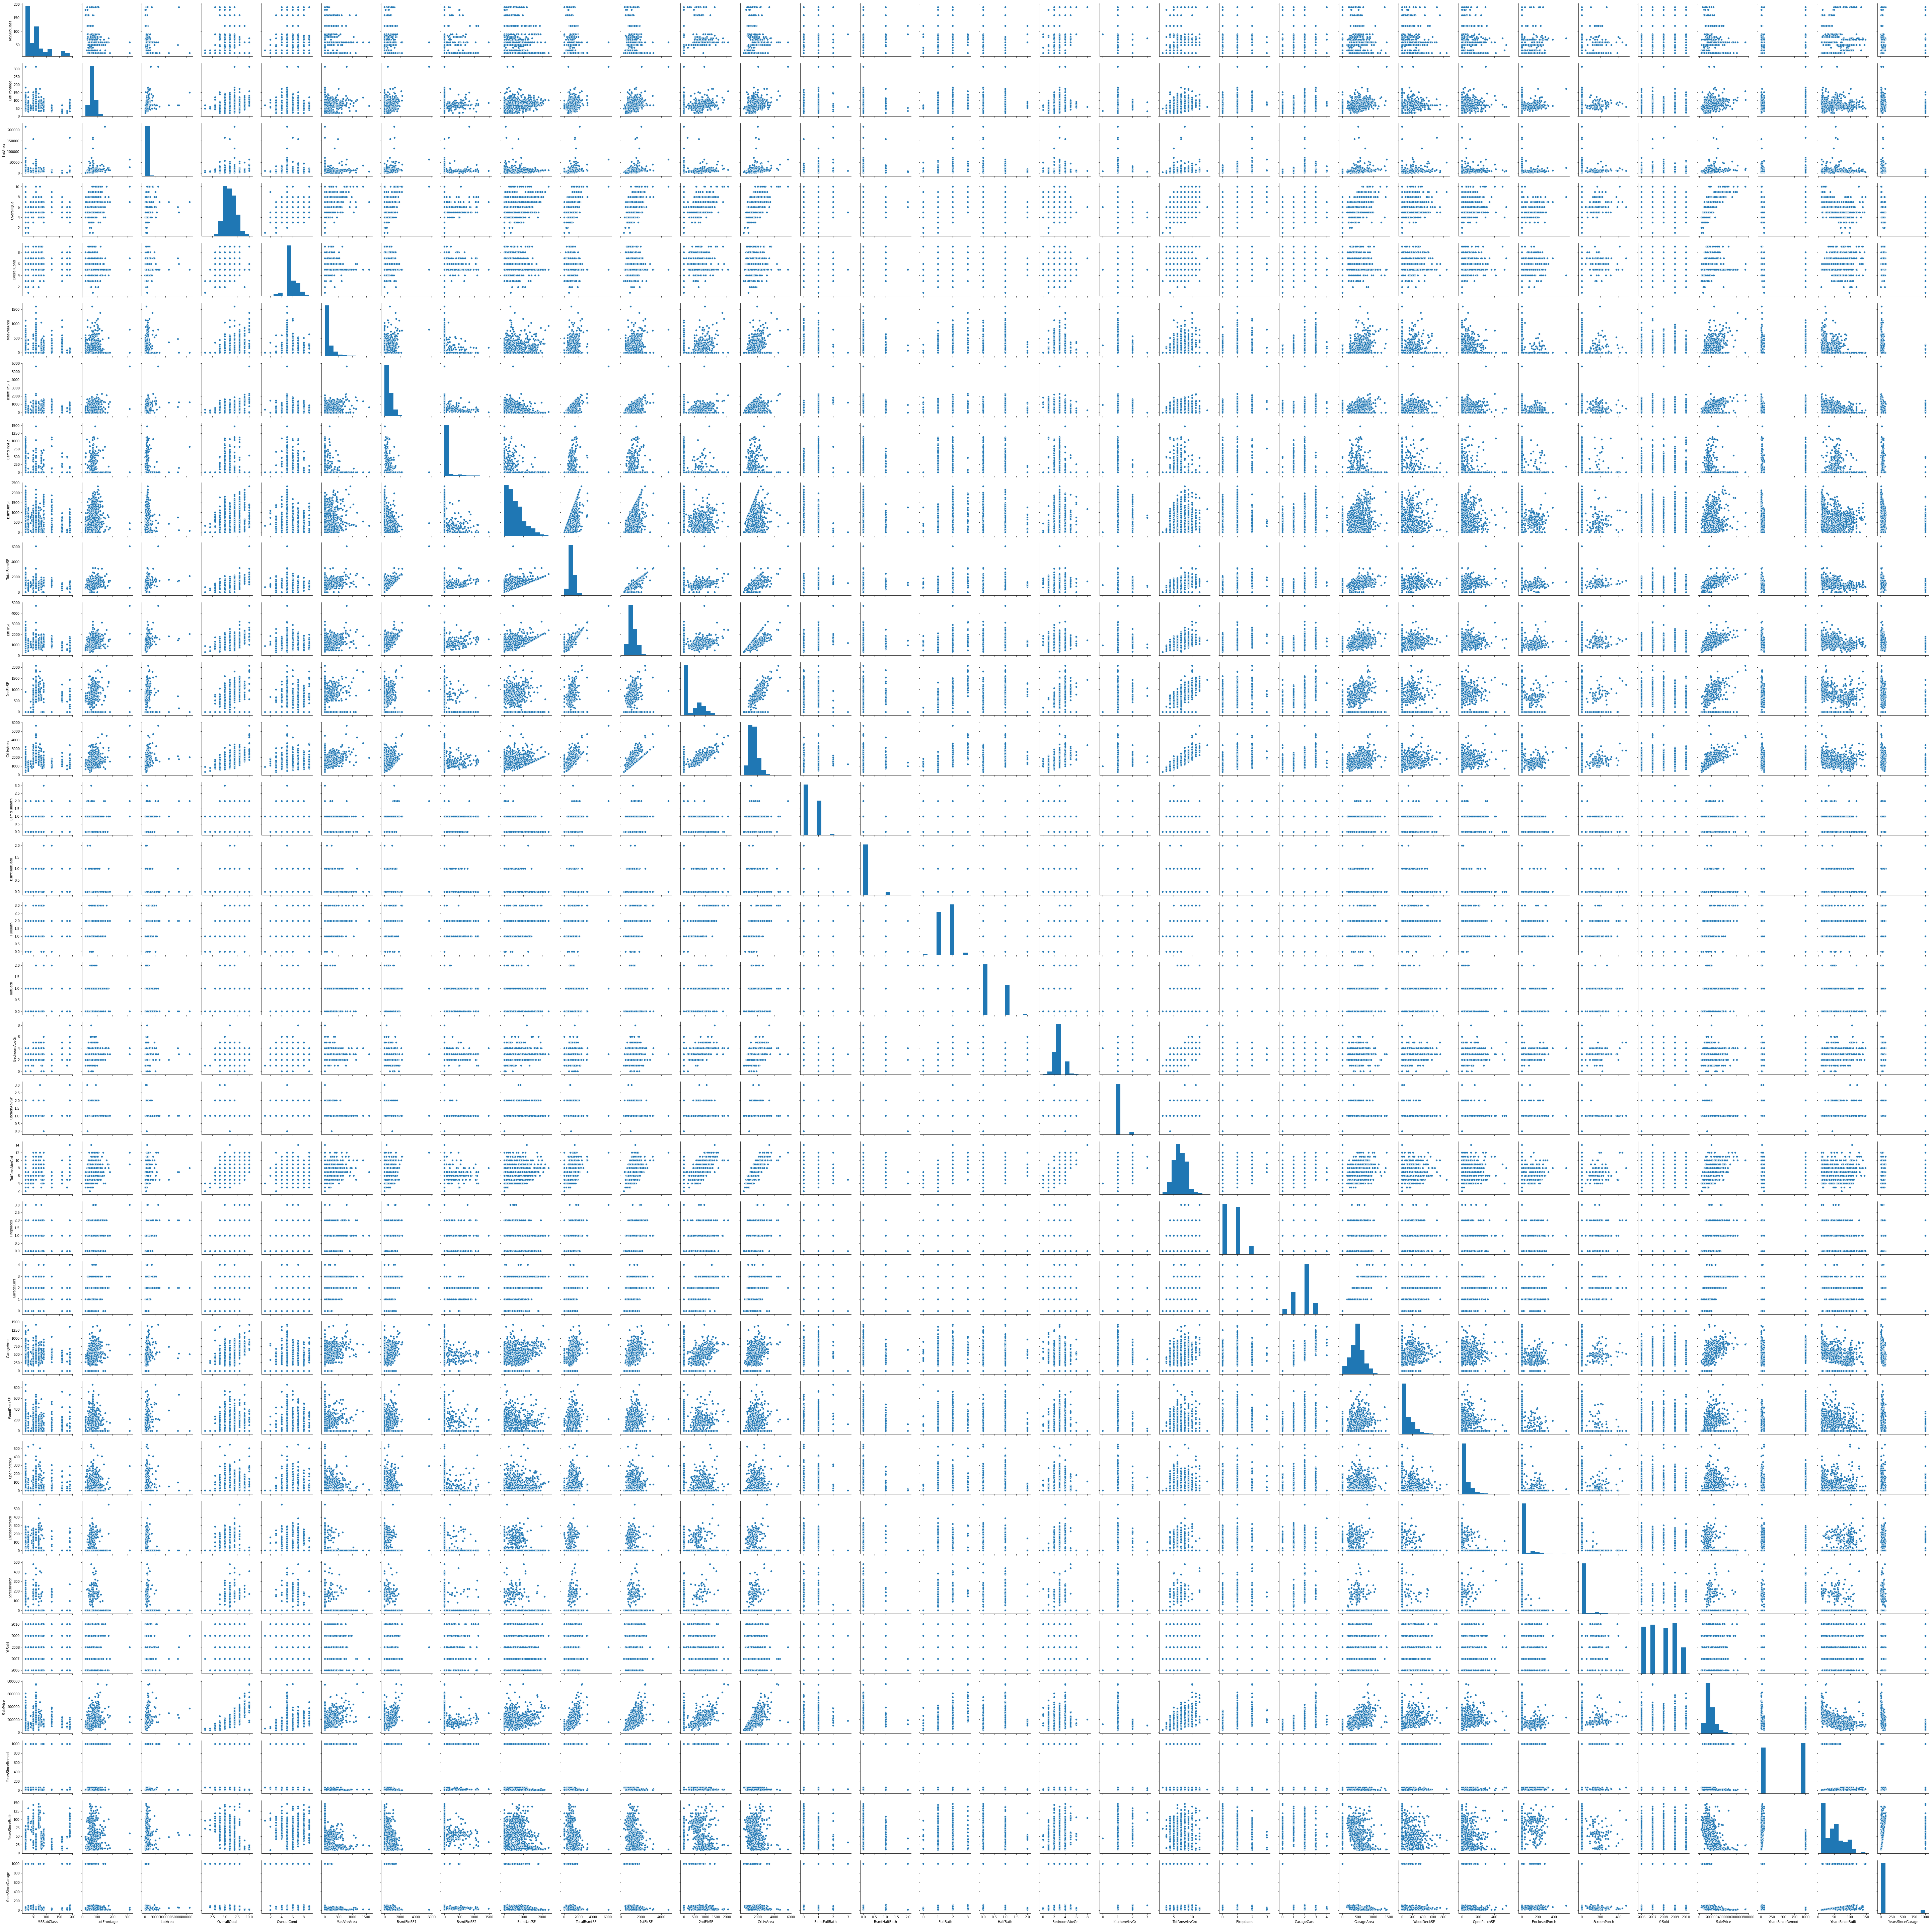

In [146]:
sns.pairplot(housing)
plt.show()

In [197]:
# Correlation matrix
cor=housing.corr()

In [198]:
# Fill diagonal values in correlation matrix with NA values
np.fill_diagonal(cor.values,np.nan)

In [199]:
# List the columns with correlation value more than 0.7
check = [column for column in cor.columns if any(cor[column] > 0.7)]
check

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [200]:
# Dataframe with highly correlated variables
h=cor[['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']]

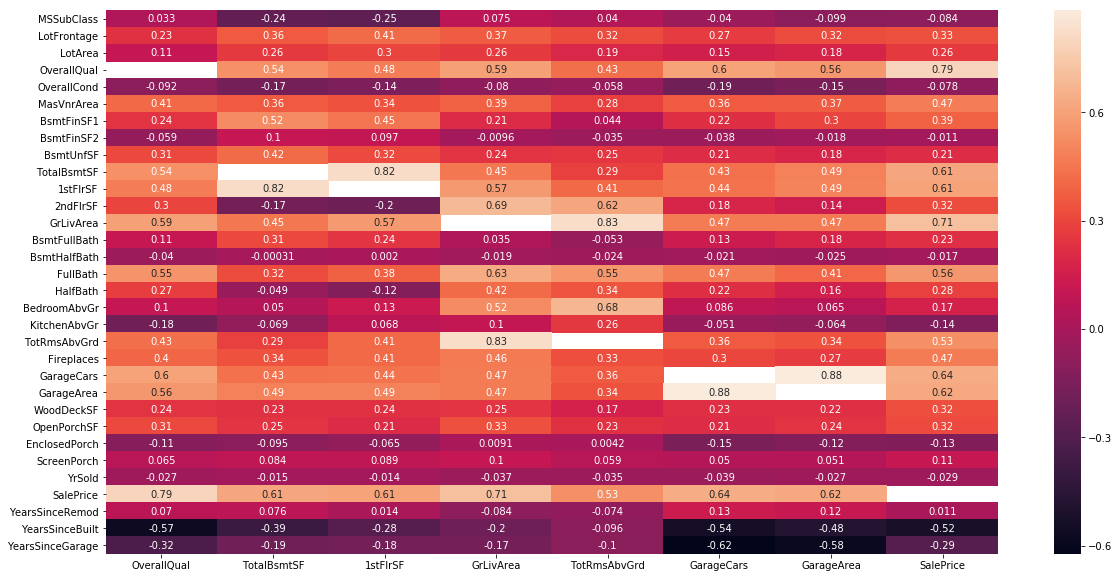

In [201]:
#Heatmap with selected variables
plt.figure(figsize=(20,10))
sns.heatmap(data=h,annot=True)
plt.show()

In [152]:
# There are no missing values in the data. All the variables re in the correct format
# except for MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd,  which needs to be changed from int to object as its a categorical variable.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
MSSubClass          1460 non-null int64
MSZoning            1460 non-null object
LotFrontage         1460 non-null float64
LotArea             1460 non-null int64
LotShape            1460 non-null object
LandContour         1460 non-null object
LotConfig           1460 non-null object
LandSlope           1460 non-null object
Neighborhood        1460 non-null object
Condition1          1460 non-null object
BldgType            1460 non-null object
HouseStyle          1460 non-null object
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
RoofStyle           1460 non-null object
Exterior1st         1460 non-null object
Exterior2nd         1460 non-null object
MasVnrType          1460 non-null object
MasVnrArea          1460 non-null float64
ExterQual           1460 non-null object
ExterCond           1460 non-null object
Foundation          1460 non-null 

In [202]:
# converting MSSubClass, OverallCond, OverallQual, YrSold to categorical
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
#housing['OverallCond'] = housing['OverallCond'].astype('object')
#housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['YrSold'] = housing['YrSold'].astype('object')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
MSSubClass          1460 non-null object
MSZoning            1460 non-null object
LotFrontage         1460 non-null float64
LotArea             1460 non-null int64
LotShape            1460 non-null object
LandContour         1460 non-null object
LotConfig           1460 non-null object
LandSlope           1460 non-null object
Neighborhood        1460 non-null object
Condition1          1460 non-null object
BldgType            1460 non-null object
HouseStyle          1460 non-null object
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
RoofStyle           1460 non-null object
Exterior1st         1460 non-null object
Exterior2nd         1460 non-null object
MasVnrType          1460 non-null object
MasVnrArea          1460 non-null float64
ExterQual           1460 non-null object
ExterCond           1460 non-null object
Foundation          1460 non-null

# Data Preparation before Modelling

In [203]:
# selecting all object variables
obj = housing.select_dtypes(include='object')
obj.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [204]:
# Creating a dummy variable for the categorical variables.
dummy = pd.get_dummies(obj,drop_first=True)
housing_df = pd.concat([housing, dummy], axis=1)
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0         60       RL         65.0     8450      Reg         Lvl    Inside   
1         20       RL         80.0     9600      Reg         Lvl       FR2   
2         60       RL         68.0    11250      IR1         Lvl    Inside   
3         70       RL         60.0     9550      IR1         Lvl    Corner   
4         60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0            5     Gable     VinylSd     VinylSd    BrkFace       196.0   
1            8     Gable     MetalSd     MetalSd       None         0.0   
2            5     Gable     VinylSd     VinylSd    BrkFace       162.0   
3            5     Gable     Wd Sdng     Wd Shng       None         0.0   
4            5     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0         706          Unf           0        150          856        Ex   
1         978          Unf           0        284         1262        Ex   
2         486          Unf           0        434          920        Ex   
3         216          Unf           0        540          756        Gd   
4         655          Unf           0        490         1145        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          Y      SBrkr       856       854       1710             1   
1          Y      SBrkr      1262         0       1262             0   
2          Y      SBrkr       920       866       1786             1   
3          Y      SBrkr       961       756       1717             1   
4          Y      SBrkr      1145      1053       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0             8        Typ           0          NA     Attchd          RFn   
1             6        Typ           1          TA     Attchd          RFn   
2             6        Typ           1          TA     Attchd          RFn   
3             7        Typ           1          Gd     Detchd          Unf   
4             9        Typ           1          TA     Attchd          RFn   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0           2         548         TA         TA          Y           0   
1           2         460         TA         TA          Y         298   
2           2         608         TA         TA          Y           0   
3           3         642         TA  

In [205]:
# Drop the original categorical variables
housing_df.drop(obj.columns,axis=1,inplace=True)

In [206]:
# As we can see below, All variables are of numeric type.
housing_df.dtypes

LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
MasVnrArea               float64
BsmtFinSF1                 int64
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
1stFlrSF                   int64
2ndFlrSF                   int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageCars                 int64
GarageArea                 int64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPorch              int64
ScreenPorch                int64
SalePrice                  int64
YearsSinceRemod            int64
YearsSinceBuilt            int64
YearsSinceGarage         float64
MSSubClass

In [207]:
# Split data into X and y
y = housing_df.pop('SalePrice')
X = housing_df

In [342]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [343]:
# Number of rows in X_test and X_train
print(X_test.shape)
print(X_train.shape)

(438, 235)
(1021, 235)


In [344]:
# List the int64 & float64 columns which needs to be scaled
cols=list(X_train.select_dtypes(include=['int64','float64']).columns)
cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YearsSinceRemod',
 'YearsSinceBuilt',
 'YearsSinceGarage']

In [345]:
# Scaling X_train data
scaler = StandardScaler()

X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
210     -0.123163 -0.473765    -0.779861     0.383154   -0.558025    0.043512   
318      0.919085 -0.056845     0.649651    -0.533005    0.809137    1.160345   
239     -0.802890 -0.169324    -0.065105    -1.449164   -0.558025   -0.761296   
986     -0.485684 -0.502297    -0.065105     2.215472   -0.558025   -0.963574   
1416    -0.440369  0.082905    -1.494617     0.383154   -0.558025   -0.963574   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
210    -0.293313  -0.374367    -0.430911 -0.765065 -0.787597  -1.228053   
318    -0.293313  -0.454644     0.621579  0.511914  2.140556   2.123103   
239    -0.293313   0.171964    -0.712011 -0.930972  0.795996  -0.056465   
986    -0.293313  -0.175904    -1.256778 -0.420683  0.669584   0.221858   
1416   -0.293313   0.475233    -0.620490  0.195183  1.611926   1.453624   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
210       1.066863     -0.247791 -1.026085 -0.751723     -1.042717   
318       1.066863     -0.247791  0.786428  1.246998      1.396261   
239      -0.837450     -0.247791 -1.026085  1.246998      0.176772   
986      -0.837450     -0.247791 -1.026085 -0.751723     -1.042717   
1416     -0.837450     -0.247791  0.786428 -0.751723      1.396261   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
210      -0.234155     -0.935650   -0.925422   -2.366798   -2.217786   
318      -0.234155      1.556976    0.623522    1.645101    0.867506   
239      -0.234155      0.310663    0.623522   -1.029498   -1.183084   
986      -0.234155     -0.935650   -0.925422   -1.029498   -1.018473   
1416      4.112612      2.803289   -0.925422    0.307802    0.416000   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  YearsSinceRemod  \
210    -0.743160    -0.709347       1.150231    -0.275126        -0.965193   
318     1.989482     0.197980       1.910043    -0.275126         0.960128   
239    -0.743160     1.407748      -0.369395    -0.275126        -0.965193   
986     2.423490    -0.709347      -0.369395    -0.275126        -1.074915   
1416   -0.743160    -0.709347       1.435160    -0.275126        -0.965193   

      YearsSinceBuilt  YearsSinceGarage  MSSubClass_30  MSSubClass_40  \
210          1.524903          4.051249              1              0   
318         -0.717033         -0.307757              0              0   
239          0.865510         -0.110639              0              0   
986          2.019448         -0.115119              0              0   
1416         2.843689         -0.209198              0              0   

      MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
210               0              0              0              0   
318               0              0              1              0   
239               0              1              0              0   
986               0              1              0              0   
1416              0              0              0              0   

      MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
210               0              0              0              0   
318               0              0              0              0   
239               0              0              0              0   
986               0              0              0              0   
1416              0              0              0              0   

      MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
210                0               0               0               0   
318                0               0               0               0   
239                0               0               0               0   
986                0               0               0               0   
1416               0               0               0               1   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_R

In [346]:
# Scaling X_test data and keeping it ready

X_test[cols] = scaler.transform(X_test[cols])
X_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
1436    -0.440369 -0.144189    -1.494617     0.383154   -0.558025    0.361992   
57       0.873770  0.112505     0.649651    -0.533005   -0.558025   -0.963574   
780     -0.304424 -0.253368     0.649651    -0.533005   -0.355087   -0.963574   
382      0.420619 -0.120412     0.649651    -0.533005   -0.558025   -0.963574   
1170     0.284673 -0.058786    -0.065105     0.383154   -0.558025    0.159714   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
1436   -0.293313  -0.704396    -0.430911 -0.765065 -0.787597  -1.228053   
57     -0.293313   0.660317    -0.439628 -0.775120  1.189021   0.381706   
780    -0.293313   1.500998     0.381881  0.212779 -0.787597  -0.496515   
382    -0.293313   0.836481    -0.267481 -0.576535  1.184425   0.526509   
1170   -0.293313   0.022559     0.074633 -0.126576 -0.787597  -0.750391   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1436     -0.837450     -0.247791 -1.026085 -0.751723      0.176772   
57       -0.837450     -0.247791  0.786428  1.246998      0.176772   
780      -0.837450     -0.247791  0.786428 -0.751723      0.176772   
382      -0.837450     -0.247791  0.786428  1.246998      0.176772   
1170      1.066863     -0.247791 -1.026085 -0.751723      0.176772   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
1436     -0.234155     -0.935650   -0.925422    0.307802    0.265498   
57       -0.234155      0.310663   -0.925422    0.307802    0.439515   
780      -0.234155     -0.312494    0.623522    0.307802   -0.327104   
382      -0.234155      0.933819   -0.925422    0.307802    0.787551   
1170     -0.234155     -0.312494    0.623522   -1.029498   -0.534044   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  YearsSinceRemod  \
1436   -0.743160    -0.709347      -0.369395    -0.275126         0.960128   
57     -0.743160     0.349201      -0.369395    -0.275126         0.960128   
780     1.025020    -0.391783      -0.369395    -0.275126        -1.060423   
382     0.414194     0.092125      -0.369395    -0.275126         0.960128   
1170    0.888388    -0.709347      -0.369395    -0.275126         0.960128   

      YearsSinceBuilt  YearsSinceGarage  MSSubClass_30  MSSubClass_40  \
1436         0.008299         -0.222638              0              0   
57          -1.079700         -0.357037              0              0   
780         -0.782973         -0.316717              0              0   
382         -1.145639         -0.365997              0              0   
1170        -0.189519         -0.236078              0              0   

      MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
1436              0              0              0              0   
57                0              0              1              0   
780               0              0              0              0   
382               0              0              1              0   
1170              0              0              0              0   

      MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
1436              0              0              0              0   
57                0              0              0              0   
780               0              0              0              0   
382               0              0              0              0   
1170              0              1              0              0   

      MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
1436               0               0               0               0   
57                 0               0               0               0   
780                0               0               0               0   
382                0               0               0               0   
1170               0               0               0               0   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_R

# Model Building

In [347]:
# Construct a Simple Linear Regression Model to start with one variable which has highest correlation with Sale Price.
# From the heatmap we saw that the variable OverallQual has highest correlation with Sale Price

# Add a constant
#X_train_lm = sm.add_constant(X_train[['OverallQual_2','OverallQual_3','OverallQual_4','OverallQual_5','OverallQual_6','OverallQual_7','OverallQual_8','OverallQual_9','OverallQual_10']])
X_train_lm = sm.add_constant(X_train['OverallQual'])
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()


In [348]:
# Check the parameters obtained
lr.params

const          180441.339863
OverallQual     62208.732323
dtype: float64

In [349]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1657.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          6.96e-216
Time:                        18:47:07   Log-Likelihood:                -12471.
No. Observations:                1021   AIC:                         2.495e+04
Df Residuals:                    1019   BIC:                         2.495e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.804e+05   1528.125    118.080      

In [350]:
# Now construct a multiple linear regression model with more variables based on the highly correlated variables from heatmap
X_train_lm = sm.add_constant(X_train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']])
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [351]:
# Check the parameters obtained
lr.params

const          180441.339863
OverallQual     33922.203590
GrLivArea       21315.693907
GarageCars      12199.266325
GarageArea       1730.933711
TotalBsmtSF     10382.426119
1stFlrSF         5024.818452
dtype: float64

In [352]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     519.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          4.07e-305
Time:                        18:47:12   Log-Likelihood:                -12246.
No. Observations:                1021   AIC:                         2.451e+04
Df Residuals:                    1014   BIC:                         2.454e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.804e+05   1230.025    146.697      

In [353]:
# Now adding all variables to the model
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                    1.891471e+05
LotFrontage             -3.428295e+03
LotArea                  5.399383e+03
OverallQual              1.184402e+04
OverallCond              4.105685e+03
MasVnrArea               2.315873e+03
BsmtFinSF1              -1.058554e+03
BsmtFinSF2               3.608921e+02
BsmtUnfSF                5.082739e+02
TotalBsmtSF             -4.409493e+02
1stFlrSF                 1.061525e+04
2ndFlrSF                 2.312230e+04
GrLivArea                9.936703e+03
BsmtFullBath             4.420436e+03
BsmtHalfBath             6.808048e+02
FullBath                 3.639834e+03
HalfBath                 6.078030e+02
BedroomAbvGr            -7.148886e+02
KitchenAbvGr            -2.540591e+03
TotRmsAbvGrd             1.954889e+03
Fireplaces               3.483461e+02
GarageCars               1.160138e+04
GarageArea              -2.754387e+03
WoodDeckSF               1.909239e+03
OpenPorchSF             -6.623885e+02
EnclosedPorch            9.205569e+02
ScreenPorch 

In [354]:
# Print a summary of the regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     32.44
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          3.82e-291
Time:                        18:47:19   Log-Likelihood:                -11787.
No. Observations:                1021   AIC:                         2.402e+04
Df Residuals:                     798   BIC:                         2.512e+04
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.891e+

In [355]:
# We can see that now the R2 has further improved to 0.9 but we cant accept this model as it definitely has 
# multicollinear variables & even the p value for few variables are reall high.

# Checking VIF

In [356]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [357]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# There are so many variables with Infinity and very high VIF values, we need to definitely remove some variables.
# since the number of variables is  huge, we cant perform this manually. Hence we can either Choose RFE method or
# lasso regularization (which also removes unnecessary variables) to get the final list of variables which can be used
# to build the model

Features     VIF
234  SaleCondition_Partial     inf
107    Exterior1st_AsphShn     inf
210          GarageCond_Po     inf
202          GarageQual_Fa     inf
38           MSSubClass_90     inf
211          GarageCond_TA     inf
42          MSSubClass_190     inf
227           SaleType_New     inf
209          GarageCond_NA     inf
208          GarageCond_Gd     inf
110     Exterior1st_CBlock     inf
207          GarageCond_Fa     inf
206          GarageQual_TA     inf
121    Exterior2nd_AsphShn     inf
205          GarageQual_Po     inf
204          GarageQual_NA     inf
7                BsmtUnfSF     inf
199        GarageFinish_NA     inf
198          GarageType_NA     inf
5               BsmtFinSF1     inf
6               BsmtFinSF2     inf
203          GarageQual_Gd     inf
124     Exterior2nd_CBlock     inf
8              TotalBsmtSF     inf
91         BldgType_2fmCon     inf
92         BldgType_Duplex     inf
28        YearsSinceGarage  529.30
145           ExterCond_TA  521.98
193      GarageType_Attchd  296.12
11               GrLivArea  254.87
102        RoofStyle_Gable  230.88
45             MSZoning_RL  221.69
187         Functional_Typ  178.85
118    Exterior1st_VinylSd  177.95
133    Exterior2nd_VinylSd  174.08
10                2ndFlrSF  160.40
9                 1stFlrSF  150.26
197      GarageType_Detchd  136.55
169       BsmtFinType2_Unf  129.91
114    Exterior1st_MetalSd  116.63
128    Exterior2nd_MetalSd  114.55
137        MasVnrType_None   87.72
96       HouseStyle_1Story   86.89
112    Exterior1st_HdBoard   81.05
126    Exterior2nd_HdBoard   75.98
119    Exterior1st_Wd Sdng   68.91
134    Exterior2nd_Wd Sdng   66.59
143           ExterCond_Gd   63.25
104          RoofStyle_Hip   55.05
156            BsmtCond_TA   53.06
141           ExterQual_TA   51.50
190         FireplaceQu_NA   49.81
130    Exterior2nd_Plywood   47.95
99       HouseStyle_2Story   46.26
229            SaleType_WD   45.95
136     MasVnrType_BrkFace   45.24
125    Exterior2nd_CmentBd   41.58
111    Exterior1st_CemntBd   41.48
46             MSZoning_RM   38.42
84         Condition1_Norm   37.59
115    Exterior1st_Plywood   37.44
94         BldgType_TwnhsE   37.21
174           CentralAir_Y   37.15
52         LandContour_Lvl   36.12
195     GarageType_BuiltIn   33.97
217               Fence_NA   33.42
40          MSSubClass_160   32.27
213           PavedDrive_Y   32.02
39          MSSubClass_120   30.16
33           MSSubClass_60   27.24
70      Neighborhood_NAmes   26.18
178       Electrical_SBrkr   24.25
181         KitchenQual_TA   23.46
153            BsmtQual_TA   23.09
140           ExterQual_Gd   22.24
101        HouseStyle_SLvl   22.23
233   SaleCondition_Normal   20.51
75    Neighborhood_OldTown   19.74
93          BldgType_Twnhs   19.51
27         YearsSinceBuilt   19.26
189         FireplaceQu_Gd   18.67
32           MSSubClass_50   17.38
43             MSZoning_FV   17.36
109    Exterior1st_BrkFace   16.83
147       Foundation_PConc   16.51
36           MSSubClass_80   16.48
135    Exterior2nd_Wd Shng   16.40
192         FireplaceQu_TA   16.30
138       MasVnrType_Stone   15.07
180         KitchenQual_Gd   15.04
63    Neighborhood_CollgCr   14.76
146      Foundation_CBlock   14.17
79    Neighborhood_Somerst   13.79
65    Neighborhood_Edwards   13.57
152            BsmtQual_Gd   13.29
95       HouseStyle_1.5Unf   12.47
142           ExterCond_Fa   12.25
117     Exterior1st_Stucco   12.21
132     Exterior2nd_Stucco   11.58
120    Exterior1st_WdShing   11.01
..                     ...     ...
49            LotShape_Reg    4.95
168       BsmtFinType2_Rec    4.93
44             MSZoning_RH    4.84
62    Neighborhood_ClearCr    4.82
68    Neighborhood_MeadowV    4.74
183        Functional_Min1    4.73
60     Neighborhood_BrDale    4.62
37           MSSubClass_85    4.48
14                FullBath    4.39
81     Neighborhood_Timber    4.37
167       BsmtFinType2_LwQ    4.29
108    Exterior1st_BrkComm    4.16
16            BedroomAbvGr  

# Lasso Regression

In [358]:
# Lasso Regression
# List of alphas to tune

params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   15.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [359]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.135724      0.008895         0.002194        0.000399      0.0001   
1       0.154188      0.012578         0.002194        0.000399       0.001   
2       0.168350      0.041791         0.001596        0.000798        0.01   
3       0.149200      0.018760         0.001996        0.000631        0.05   
4       0.120676      0.006402         0.001397        0.000488         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -21772.840812      -20704.233938      -23758.203922   
1   {'alpha': 0.001}      -21772.709307      -20704.187457      -23757.992903   
2    {'alpha': 0.01}      -21771.395017      -20703.722929      -23755.843330   
3    {'alpha': 0.05}      -21765.565190      -20701.721097      -23746.318324   
4     {'alpha': 0.1}      -21758.052756      -20699.141318      -23734.642785   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -21261.905656      -23760.528080    -22251.073626     1276.158710   
1      -21261.638301      -23753.359901    -22249.510122     1274.479385   
2      -21258.878718      -23726.618813    -22242.829571     1268.329933   
3      -21246.320421      -23715.524288    -22234.629997     1266.337594   
4      -21230.771800      -23708.617857    -22225.786740     1265.553796   

   rank_test_score  split0_train_score  split1_train_score  \
0               28       -16024.658975       -12886.144268   
1               27       -16024.643860       -12886.118103   
2               26       -16024.494480       -12885.936171   
3               25       -16023.990790       -12885.325944   
4               24       -16023.463103       -12884.516486   

   split2_train_score  split3_train_score  split4_train_score  \
0       -14986.722536       -15966.407501       -15650.946018   
1       -14986.706339       -15966.387074       -15650.923591   
2       -14986.558725       -15966.246453       -15650.724650   
3       -14986.019461       -15965.684508       -15650.001274   
4       -14985.421225       -15965.203496       -15649.341084   

   mean_train_score  std_train_score  
0     -15102.975860      1168.173138  
1     -15102.955793      1168.175882  
2     -15102.792096      1168.184847  
3     -15102.204396      1168.196772  
4     -15101.589079      1168.299592

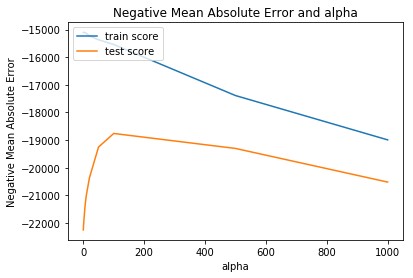

In [360]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [361]:
model_cv.best_params_

# As we can see, the model shows best alpha value as 100. Also we can see that the error is the least for alpha=100
# and then gradually it increases

{'alpha': 100}

In [362]:
# Using alpha as 100 as the error is the least at that point and then gradually increases.
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

#predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8884769575332326


In [363]:
# List the coefficients of the lasso model
lasso.coef_

# We can see many variables have 0 as their coefficients, hence we can remove these variables from our model

array([-2.68471650e+03,  3.87215316e+03,  1.47510916e+04,  5.37244335e+03,
        3.24846124e+03, -2.37119644e+01,  0.00000000e+00,  1.55571408e+03,
        0.00000000e+00,  1.01501054e+04,  1.88505794e+04,  1.00539943e+04,
        4.80592021e+03,  6.56355369e+02,  3.64537756e+03,  7.62325851e+02,
       -1.43493308e+03, -4.88154736e+03,  1.71593179e+03,  2.04368888e+03,
        9.67068285e+03, -5.72110918e+02,  1.84327860e+03, -7.91391682e+02,
        5.64196611e+02,  1.08738752e+03, -2.42731115e+03, -8.22823922e+03,
        2.74324585e+03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.02707838e+03, -9.35699963e+02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.17211746e+04,
       -7.55965507e+03, -0.00000000e+00, -1.41802066e+03,  0.00000000e+00,
        0.00000000e+00,  4.95083939e+03, -0.00000000e+00,  0.00000000e+00,
       -8.49541858e+03,  2.29667808e+02,  1.13793583e+04,  1.39553172e+04,
        1.55829959e+04,  

In [366]:
# Coefficients against each variable
coeff = pd.Series(lasso.coef_, index = X_train.columns)
coeff.head()

LotFrontage    -2684.716505
LotArea         3872.153156
OverallQual    14751.091639
OverallCond     5372.443349
MasVnrArea      3248.461242
dtype: float64

In [367]:
print("Lasso picked " + str(sum(coeff != 0)-1) + " variables and removed " +  str(sum(coeff == 0)) + " variables")

Lasso picked 111 variables and removed 123 variables


In [368]:
# View top 15 variables with positive and 15 variables with negative correlation with Sale Price
print(coeff.sort_values().head(15))
print(coeff.sort_values().tail(15))

BsmtQual_Gd            -28492.484150
KitchenQual_TA         -25167.461512
KitchenQual_Gd         -25144.454246
BsmtQual_TA            -21987.019162
KitchenQual_Fa         -18383.948006
Neighborhood_Edwards   -15433.880311
BsmtQual_Fa            -14221.032519
BldgType_Twnhs         -12923.948055
MSSubClass_120         -11721.174591
Neighborhood_Mitchel    -9588.838973
LotShape_IR3            -8495.418577
BldgType_TwnhsE         -8353.261462
YearsSinceBuilt         -8228.239218
HouseStyle_2Story       -7996.237191
BsmtExposure_No         -7802.503943
dtype: float64
LandContour_HLS         11379.358319
Exterior2nd_ImStucc     11888.479459
Condition1_Norm         12678.120068
LandContour_Low         13955.317229
OverallQual             14751.091639
LandContour_Lvl         15582.995920
HouseStyle_1Story       16055.431924
Exterior1st_BrkFace     17206.031211
BsmtExposure_Gd         17271.516441
2ndFlrSF                18850.579362
Neighborhood_StoneBr    21063.581687
Neighborhood_Somerst   

In [369]:
# Final list of variables
List = coeff[(coeff!=0) & (coeff.index!='constant')]
List.index

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'Fence_MnPrv',
       'Fence_NA', 'YrSold_2007', 'YrSold_2010', 'SaleType_New',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=112)

In [370]:
# predicting on test data and compute r2 score
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# The R2 score on Train data is 0.8884769575332326 whereas the R2 score on test data is 0.8674410054928473


0.8674410054928473


In [371]:
# Now perform Ridge Regression with only final list of variables
# List of alphas to tune

params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

X_train_ridge = X_train[list(List.index)]

ridge = Ridge()

# cross validation
folds= 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose=1)
model_cv.fit(X_train_ridge,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [372]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.004388      0.001017         0.001597    4.900658e-04      0.0001   
1        0.003990      0.000631         0.001197    3.987805e-04       0.001   
2        0.003591      0.000799         0.001396    4.888502e-04        0.01   
3        0.004189      0.000747         0.000997    1.016010e-06        0.05   
4        0.003789      0.000749         0.000997    1.004758e-06         0.1   
5        0.003992      0.000631         0.001593    4.906419e-04         0.2   
6        0.004388      0.001354         0.001396    4.886559e-04         0.3   
7        0.003791      0.000747         0.001396    4.880740e-04         0.4   
8        0.003592      0.000490         0.001199    9.814691e-04         0.5   
9        0.003588      0.000487         0.000997    9.584308e-07         0.6   
10       0.003390      0.000490         0.001196    3.987313e-04         0.7   
11       0.003989      0.000631         0.001396    4.883830e-04         0.8   
12       0.005187      0.000399         0.001595    4.885005e-04         0.9   
13       0.005585      0.000798         0.000998    3.148570e-06           1   
14       0.005582      0.001849         0.001595    4.879559e-04           2   
15       0.004388      0.001018         0.001396    7.972258e-04           3   
16       0.003787      0.000397         0.000997    6.295456e-04           4   
17       0.003989      0.000631         0.000997    6.305249e-04           5   
18       0.003591      0.000489         0.001395    4.875283e-04           6   
19       0.002793      0.000399         0.000997    6.312055e-04           7   
20       0.004388      0.000489         0.000997    5.560829e-07           8   
21       0.003591      0.000489         0.000997    3.234067e-07           9   
22       0.002992      0.000631         0.000997    7.008046e-07          10   
23       0.003192      0.000747         0.000797    3.985671e-04          20   
24       0.003591      0.000489         0.000998    7.448435e-07          50   
25       0.003392      0.000488         0.001198    9.778370e-04         100   
26       0.004189      0.000747         0.000997    3.162980e-07         500   
27       0.004389      0.000488         0.001396    4.880332e-04        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -18561.959064      -19091.538102   
1    {'alpha': 0.001}      -18561.402359      -19091.482392   
2     {'alpha': 0.01}      -18555.844103      -19090.926519   
3     {'alpha': 0.05}      -18531.542412      -19088.482379   
4      {'alpha': 0.1}      -18502.840584      -19085.485546   
5      {'alpha': 0.2}      -18449.745044      -19079.672626   
6      {'alpha': 0.3}      -18398.082718      -19074.078834   
7      {'alpha': 0.4}      -18350.304491      -19069.670881   
8      {'alpha': 0.5}      -18305.301705      -19066.353094   
9      {'alpha': 0.6}      -18263.521320      -19063.667163   
10     {'alpha': 0.7}      -18223.601673      -19062.683826   
11     {'alpha': 0.8}      -18185.733339      -19062.800096   
12     {'alpha': 0.9}      -18149.199858      -19062.882380   
13     {'alpha': 1.0}      -18113.655561      -19062.928405   
14     {'alpha': 2.0}      -17793.457150      -19074.665321   
15     {'alpha': 3.0}      -17565.892049      -19104.466365   
16     {'alpha': 4.0}      -17390.572814      -19135.633418   
17     {'alpha': 5.0}      -17245.591479      -19176.477205   
18     {'alpha': 6.0}      -17122.689708      -19226.733675   
19     {'alpha': 7.0}      -17025.946617      -19288.625603   
20     {'alpha': 8.0}      -16955.060529      -19352.341772   
21     {'alpha': 9.0}      -16907.018777      -19411.586345   
22    {'alpha': 10.0}      -16867.850919      -19466.780191   
23      {'alpha': 20}      -16714.530010      -19979.821937   
24      {'alpha': 50}      -16580.686104      -20869.548064   
25     {'alpha': 100}      -16619.345084     

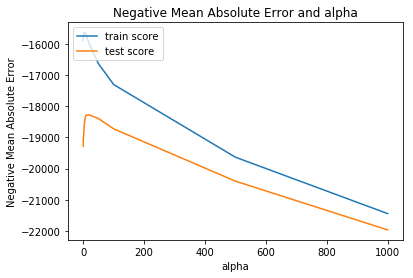

In [373]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [374]:
model_cv.best_params_

{'alpha': 10.0}

In [375]:
# The best alpha value (hyperparameter) for Ridge model is 10 at which the error is the least and we can see that the error value increases
# with increase in alpha value

In [389]:
# Using alpha as 10
alpha =10
ridge = Ridge(alpha=alpha)     
ridge.fit(X_train_ridge, y_train) 

# Train R2 score - Ridge
y_train_pred_r = ridge.predict(X_train_ridge)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_r))

0.8872534047317375


In [390]:
# Coefficients against each variable
Rcoeff = pd.Series(ridge.coef_, index = X_train_ridge.columns)
Rcoeff.head()

LotFrontage    -2629.864909
LotArea         4061.554005
OverallQual    15581.865672
OverallCond     5233.050442
MasVnrArea      4557.430397
dtype: float64

In [391]:
print("Ridge picked " + str(sum(Rcoeff != 0)) + " variables and removed " +  str(sum(Rcoeff == 0)) + " variables")

Ridge picked 112 variables and removed 0 variables


In [394]:
X_test_ridge=X_test[list(List.index)]

#Test R2 score
y_test_pred = ridge.predict(X_test_ridge)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

#The Test R2 score is 0.8655 and Train R2 score is 0.8674410054928473

0.8655267199216833


In [281]:
# The R2 score of Ridge REgression is better than Lasso as both test and Train R2 score is 0.86 with alpha value of 10 and with
# reduced number of variables as given by lasso Regression (variable selection).
# The R2 score of lasso is 0.88 for Train and 0.86 for test. However its 0.86 for both train and test for Ridge.
# Hence finalising the model provided by Ridge Regression

In [395]:
# The top 5 variables which are positively as well as negatively correlated to Sale Price are
print(Rcoeff.sort_values().head(5))
print(Rcoeff.sort_values().tail(5))

BsmtQual_Gd            -24640.148009
KitchenQual_Gd         -21044.751179
KitchenQual_TA         -19319.989749
BsmtQual_TA            -16664.665824
Neighborhood_Edwards   -15352.974380
dtype: float64
2ndFlrSF                17091.806014
Neighborhood_Somerst    17912.809097
Neighborhood_Crawfor    18363.123051
Neighborhood_NridgHt    26161.613263
Neighborhood_NoRidge    33117.047492
dtype: float64


# Hence the Sale Price of a house increases with increase in 2nd Floor Square Feet, and in Somerset,Crawford,Northridge Heights,Northridge Neighbourhoods.
# The Sale Price of a house decreases due to BsmtQual_Good,KitchenQual_Good,KitchenQual_Typical/Average, Basement Quality Average and sale price decreases in Edwards neighbourhood.
